# Linear regression demo

Load packages we will use

In [2]:
# math 
import numpy as np

# dataframes
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn

# linear regression two ways
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# for choosing covariates to include in model
from patsy import dmatrices 

# Basic python

In [3]:
# basic math 
2+2+17

21

In [4]:
2*pi

NameError: name 'pi' is not defined

In [5]:
2 * np.pi

6.283185307179586

In [6]:
# lists
a = [1, 2, 3]
a

[1, 2, 3]

In [7]:
a.append(17)
a

[1, 2, 3, 17]

In [8]:
# python uses 0-based indexing 
a[0]

1

In [9]:
# dictionaries 
d = {'a': 1, 'b': 2, 'c': 3}
d

{'a': 1, 'b': 2, 'c': 3}

In [10]:
d['b']

2

In [11]:
d['d']

KeyError: 'd'

In [12]:
d['d'] = 4
d['d']

4

In [13]:
# for loops
for i in range(10):
    print("hello", i)
    print("hello", i)

hello 0
hello 0
hello 1
hello 1
hello 2
hello 2
hello 3
hello 3
hello 4
hello 4
hello 5
hello 5
hello 6
hello 6
hello 7
hello 7
hello 8
hello 8
hello 9
hello 9


In [51]:
# functions, if statements
def fibonacci(n=5):
    if n==0:
        return 1
    else:
        return n*fibonacci(n-1)
    
fibonacci()

120

# Jupyter workflow tips

* run a cell with Shift-Enter
* Jupyter displays value of last expression in cell 
* open a new cell below the current one (Alt-Enter) to see values of variables, test assumptions
* you can reorder cells using the arrows in the toolbar, or by copy-pasting cells up or down

# Electricity usage example

In [55]:
usage = pd.read_csv('elec_usage.txt')
usage.head()

,month,year,usage,temperature
0,8,1989,24.828,73
1,9,1989,24.688,67
2,10,1989,19.310,57
3,11,1989,59.706,43
4,12,1989,99.667,26


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x104580940>,
      dtype=object)

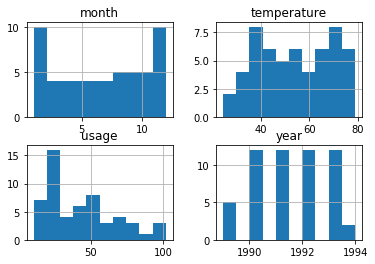

In [56]:
usage.hist()

(array([0.09917355, 0.09917355, 0.07933884, 0.07933884, 0.07933884,
        0.07933884, 0.07933884, 0.09917355, 0.09917355, 0.09917355,
        0.09917355, 0.09917355]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <a list of 12 Patch objects>)

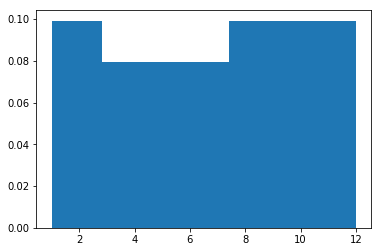

In [60]:
plt.hist(usage['month'], bins=12, density=True)

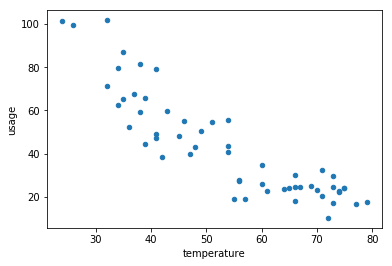

In [63]:
usage.plot.scatter(x='temperature', y='usage')

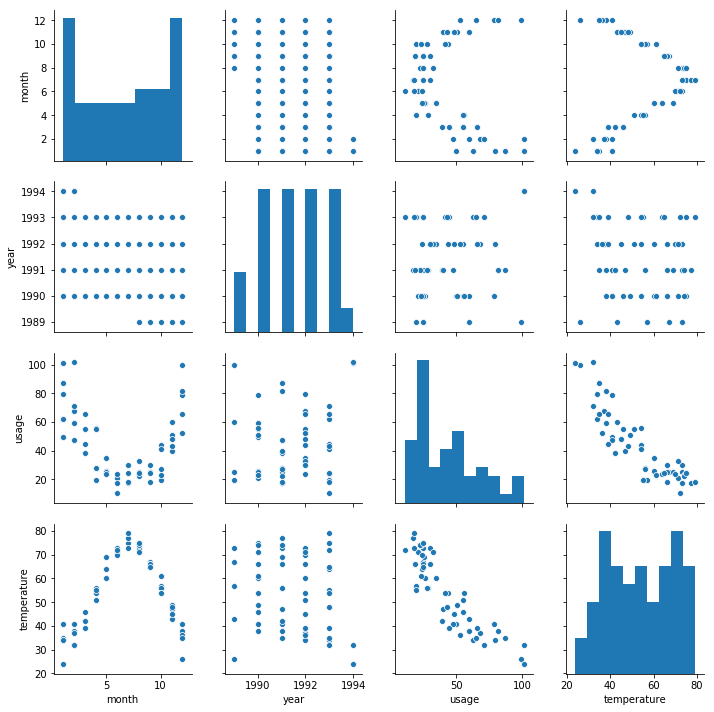

In [64]:
seaborn.pairplot(usage)

In [65]:
# add two more predictors: nonlinear functions of original variables
usage['tempsqr'] = usage['temperature']**2
usage['yearcts'] = usage['year'] + (usage['month']-1)/12
usage.head()

,month,year,usage,temperature,tempsqr,yearcts
0,8,1989,24.828,73,5329,1989.583333
1,9,1989,24.688,67,4489,1989.666667
2,10,1989,19.310,57,3249,1989.750000
3,11,1989,59.706,43,1849,1989.833333
4,12,1989,99.667,26,676,1989.916667


In [66]:
variables = list(usage.columns)
variables

['month', 'year', 'usage', 'temperature', 'tempsqr', 'yearcts']

In [21]:
features = variables[0:2] + variables[3:]
features

['month', 'year', 'temperature', 'tempsqr', 'yearcts']

In [22]:
target = variables[2]
target

'usage'

In [73]:
X = usage[features] # the design matrix
Y = usage[target]   # the target vector
X.head() 

,month,year,temperature,tempsqr,yearcts
0,8,1989,73,5329,1989.583333
1,9,1989,67,4489,1989.666667
2,10,1989,57,3249,1989.750000
3,11,1989,43,1849,1989.833333
4,12,1989,26,676,1989.916667


In [87]:
# more concise way of collecting data
Y, X = dmatrices('usage ~ 1 + temperature + np.power(temperature, 2)', data=usage, return_type='dataframe')
X.head()

,Intercept,temperature,"np.power(temperature, 2)"
0,1.0,73.0,5329.0
1,1.0,67.0,4489.0
2,1.0,57.0,3249.0
3,1.0,43.0,1849.0
4,1.0,26.0,676.0


modifications:
    * add an intercept to the model
    * add other nonlinear terms

In [88]:
# fit a least squares model
model = sm.OLS(Y, X).fit()
Yhat = model.predict(X) # make the predictions by the model

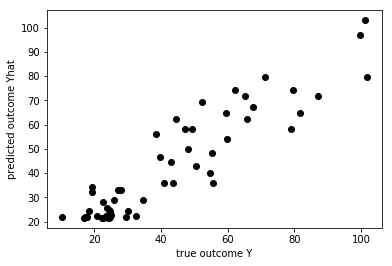

In [90]:
# Plot outputs
plt.scatter(Y, Yhat,  color='black')
plt.xlabel("true outcome Y")
plt.ylabel("predicted outcome Yhat")

plt.show()

In [91]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  usage   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     143.8
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           6.47e-22
Time:                        10:55:43   Log-Likelihood:                -200.75
No. Observations:                  55   AIC:                             407.5
Df Residuals:                      52   BIC:                             413.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  196.7153     17.488     11.249      0.000     161.624     231.807
temperature                 -4.6405      0.695     -6.678      0.000      -6.035      -3.246
np.power(temperature, 2)     0.0307      0.006      4.749      0.000       0.018       0.044
==============================================================================
Omnibus:                        1.155   Durbin-Watson:                   1.166
Prob(Omnibus):                  0.561   Jarque-Bera (JB):                0.888
Skew:                           0.310   Prob(JB):                        0.642
Kurtosis:                       2.955   Cond. No.                     4.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

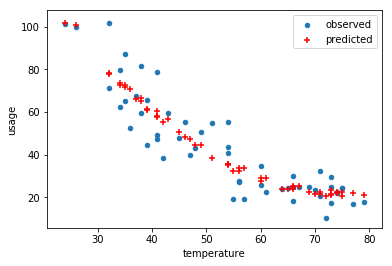

In [27]:
# plot observed vs predicted usage as a function of temperature
p = usage.plot.scatter(x='temperature', y='usage', label='observed')
p.scatter(x=usage['temperature'], y=Yhat, color='r', marker="+", label='predicted')
plt.legend()

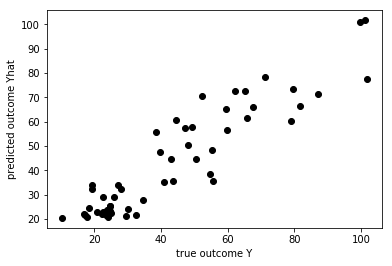

In [28]:
# let's make a function to plot predictions against truth
def plot_fit(Y, Yhat):
    plt.scatter(Y, Yhat,  color='black')
    plt.xlabel("true outcome Y")
    plt.ylabel("predicted outcome Yhat")
    plt.show()
    
plot_fit(Y, Yhat)

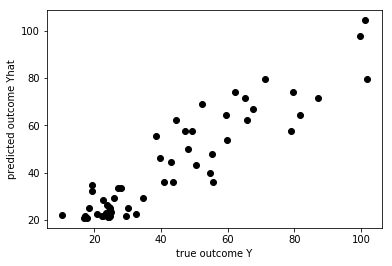

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  usage   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     94.24
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           8.40e-21
Time:                        10:34:12   Log-Likelihood:                -200.69
No. Observations:                  55   AIC:                             409.4
Df Residuals:                      51   BIC:                             417.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  212.9949     54.111      3.936      0.000     104.363     321.626
temperature                 -5.6893      3.369     -1.688      0.097     -12.454       1.075
np.power(temperature, 2)     0.0520      0.067      0.775      0.442      -0.083       0.187
np.power(temperature, 3)    -0.0001      0.000     -0.318      0.752      -0.001       0.001
==============================================================================
Omnibus:                        1.438   Durbin-Watson:                   1.181
Prob(Omnibus):                  0.487   Jarque-Bera (JB):                1.122
Skew:                           0.349   Prob(JB):                        0.571
Kurtosis:                       2.967   Cond. No.                     9.98e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
# we could even make a function to help us visually search for a good model 

def assess_model_quality(data, formula):
    Y, X = dmatrices(formula, data=data, return_type='dataframe')
    model = sm.OLS(Y, X).fit()
    Yhat = model.predict(X)
    plot_fit(Y, Yhat)
    return model.summary()
    
assess_model_quality(usage, 'usage ~ 1 + temperature + np.power(temperature, 2) + np.power(temperature, 3)')

# What do p-values mean?

In [128]:
n = 20
x = np.random.randn(n)
eps = np.random.randn(n)
y = eps
model = sm.OLS(y, x).fit()

In [129]:
model.pvalues

array([0.565452])

In [130]:
pvalues = []
for i in range(1000):
    n = 20
    y = np.random.randn(n)
    x = np.random.randn(n)
    model = sm.OLS(y, x).fit()
    pvalues.append(model.pvalues[0])

(array([50., 47., 38., 29., 51., 50., 54., 45., 46., 52., 52., 50., 68.,
        46., 49., 64., 46., 55., 51., 57.]),
 array([7.98365445e-04, 5.07405263e-02, 1.00682687e-01, 1.50624848e-01,
        2.00567009e-01, 2.50509170e-01, 3.00451331e-01, 3.50393492e-01,
        4.00335653e-01, 4.50277813e-01, 5.00219974e-01, 5.50162135e-01,
        6.00104296e-01, 6.50046457e-01, 6.99988618e-01, 7.49930779e-01,
        7.99872940e-01, 8.49815101e-01, 8.99757261e-01, 9.49699422e-01,
        9.99641583e-01]),
 <a list of 20 Patch objects>)

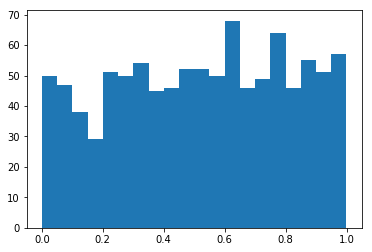

In [131]:
plt.hist(pvalues, bins=20)

In [34]:
# around 5% of the pvalues are <.05, just by random chance 
sum(np.array(pvalues) <= .05) / len(pvalues)

0.055

# Model selection and p values: be careful!

In [133]:
df = pd.DataFrame()
n = 500
p = 100
for j in range(p):
    xp = 'x'+str(j)
    df[xp] = np.random.randn(n)
y = np.random.randn(n)
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,0.852720,0.160294,0.268895,-0.764978,-2.764368,-0.386737,1.403361,0.610256,1.655574,-1.171468,...,-0.259652,-0.800270,0.256292,-0.693428,0.138535,-1.171310,-0.112256,-0.290605,-0.493361,0.584487
1,-0.629885,1.317998,0.308008,0.156976,-0.051215,-0.254895,0.275517,-1.523374,-0.881778,-0.584091,...,0.112415,1.171262,-0.025317,0.456414,1.072955,1.225253,0.312644,-0.286500,0.914087,-0.837512
2,0.450558,1.208782,0.377491,1.751419,-1.127858,-0.263190,0.742419,-0.168445,-1.091177,0.317916,...,-0.068101,0.854074,1.097030,-0.639169,-0.757836,0.550062,-0.970695,-1.249099,0.663378,-2.128267
3,1.242560,0.249750,-0.873520,-0.182595,0.322330,0.401512,-0.631421,0.815741,-0.768486,-0.387734,...,0.624224,0.375177,0.460816,-1.391764,0.325096,0.038317,0.417085,0.164465,0.484351,-0.873041
4,1.053466,0.652287,0.314540,-0.719666,-2.849607,0.763892,-0.290469,2.245973,-1.616283,0.912843,...,-1.659795,-0.646724,-1.695989,-0.325921,-0.262890,-0.200539,0.160625,-1.443161,-1.096072,0.547300


In [134]:
variables = df.columns
model = sm.OLS(y,df[variables]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.9695
Date:                Tue, 14 Apr 2020   Prob (F-statistic):              0.565
Time:                        10:26:49   Log-Likelihood:                -681.39
No. Observations:                 500   AIC:                             1563.
Df Residuals:                     400   BIC:                             1984.
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0             0.0322      0.054      0.593      0.553      -0.075       0.139
x1            -0.0006      0.054     -0.011      0.991      -0.107       0.105
x2             0.0102      0.051      0.202      0.840      -0.089       0.110
x3            -0.0597      0.053     -1.134      0.257      -0.163       0.044
x4            -0.0360      0.054     -0.661      0.509      -0.143       0.071
x5            -0.0205      0.048     -0.423      0.673      -0.116       0.075
x6            -0.0149      0.051     -0.290      0.772      -0.116       0.086
x7            -0.0420      0.052     -0.804      0.422      -0.145       0.061
x8            -0.0211      0.055     -0.382      0.703      -0.130       0.088
x9             0.1668      0.053      3.173      0.002       0.063       0.270
x10           -0.0228      0.051     -0.451      0.652      -0.122       0.077
x11           -0.0392      0.051     -0.765      0.445      -0.140       0.062
x12           -0.0169      0.051     -0.333      0.740      -0.117       0.083
x13            0.0458      0.054      0.851      0.395      -0.060       0.151
x14           -0.0051      0.052     -0.098      0.922      -0.107       0.097
x15           -0.0406      0.056     -0.722      0.471      -0.151       0.070
x16            0.0278      0.054      0.513      0.609      -0.079       0.134
x17           -0.0063      0.054     -0.116      0.907      -0.113       0.100
x18            0.0679      0.052      1.296      0.196      -0.035       0.171
x19           -0.0299      0.051     -0.588      0.557      -0.130       0.070
x20           -0.0435      0.054     -0.802      0.423      -0.150       0.063
x21            0.1209      0.056      2.155      0.032       0.011       0.231
x22           -0.0487      0.056     -0.870      0.385      -0.159       0.061
x23           -0.0248      0.051     -0.489      0.625      -0.125       0.075
x24            0.0018      0.054      0.034      0.973      -0.105       0.109
x25           -0.0414      0.050     -0.829      0.407      -0.140       0.057
x26            0.0721      0.053      1.370      0.172      -0.031       0.176
x27            0.0486      0.056      0.863      0.389      -0.062       0.159
x28            0.0388      0.055      0.702      0.483      -0.070       0.148
x29            0.0559      0.054      1.044      0.297      -0.049       0.161
x30           -0.0097      0.050     -0.195      0.846      -0.107       0.088
x31            0.0966      0.053      1.834      0.067      -0.007       0.200
x32           -0.0471      0.053     -0.893      0.373      -0.151       0.057
x33           -0.0388      0.054     -0.721      0.471      -0.144       0.067
x34           -0.0238      0.050     -0.475      0.635      -0.122       0.075
x35           -0.0215      0.054     -0.398      0.691      -0.128       0.085
x3

In [135]:
# uncomment this line the first time you run the cell; comment it out for subsequent runs
stat_sig_vars = variables
stat_sig_vars = stat_sig_vars[model.pvalues <= .05]
model = sm.OLS(y,df[stat_sig_vars]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     6.674
Date:                Tue, 14 Apr 2020   Prob (F-statistic):           0.000201
Time:                        10:28:54   Log-Likelihood:                -725.78
No. Observations:                 500   AIC:                             1458.
Df Residuals:                     497   BIC:                             1470.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x9             0.1294      0.046      2.806      0.005       0.039       0.220
x21            0.1157      0.048      2.388      0.017       0.020       0.211
x61            0.1234      0.045      2.729      0.007       0.035       0.212
==============================================================================
Omnibus:                        0.137   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.934   Jarque-Bera (JB):                0.098
Skew:                           0.034   Prob(JB):                        0.952
Kurtosis:                       3.008   Cond. No.                         1.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Now let's fit the same model, using sklearn

In [35]:
lm = LinearRegression()
model = lm.fit(X,Y)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
Yhat = lm.predict(X)
Yhat[:5]

array([[ 23.43680686],
       [ 25.50676803],
       [ 33.97277473],
       [ 56.57815002],
       [100.98360633]])

In [37]:
# how well does the model fit? 
lm.score(X,Y) # R^2 score

0.8497213568380639

In [38]:
# what about the coefficients?
lm.coef_

array([[-4.82539599,  0.03226385,  0.24639928, -0.34673328, -0.32620001]])

In [39]:
# and the intercept β_0
lm.intercept_

array([1540.44007106])

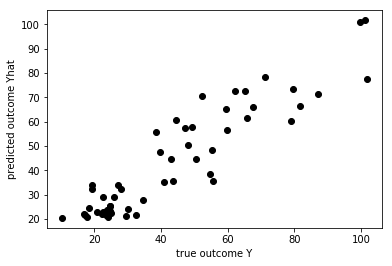

In [40]:
# and visualize the fit 
plot_fit(Y, Yhat)